In [35]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

In [11]:
visa_data_df = pd.read_csv("ABS_NOM_VISA.csv")
visa_data_df.head(2)

,DATAFLOW,MEASURE: Type of Visa,MIGRATIONTYPE: Migration Type,REGION: Region,FREQ: Frequency,TIME_PERIOD: Time Period,OBS_VALUE,UNIT_MEASURE: Unit of Measure,OBS_STATUS: Observation Status,OBS_COMMENT: Observation Comment,REPYEAREND: Reporting Year End Day
0,ABS:ABS_NOM_VISA_FY(1.0.0),2: Temporary visa - Vocational Education and T...,1: NOM arrivals,2: Victoria,A: Annual,2005,2300,PSNS: Persons,NaN,NaN,30-6: Year Ending 30 June
1,ABS:ABS_NOM_VISA_FY(1.0.0),2: Temporary visa - Vocational Education and T...,1: NOM arrivals,2: Victoria,A: Annual,2006,3630,PSNS: Persons,NaN,NaN,30-6: Year Ending 30 June


In [12]:
region = visa_data_df["REGION: Region"].unique()
region

array(['2: Victoria', '5: Western Australia', 'AUS: Australia',
       '8: Australian Capital Territory', '7: Northern Territory',
       '3: Queensland', '6: Tasmania', '1: New South Wales',
       '4: South Australia'], dtype=object)

In [13]:
#Cleaning Dataset 
#Drop all the rows from Australia

region_to_drop = 'AUS: Australia'
clean_visa_region_df = visa_data_df[visa_data_df["REGION: Region"] != region_to_drop]
clean_visa_region_df.head(2)

#Convert column "Time Period" to Date Format
df = pd.DataFrame(clean_visa_region_df)
df["date"] = pd.to_datetime(df["TIME_PERIOD: Time Period"].astype(str), format="%Y")

In [14]:
#Get Unique Types of Visa and Years into the Dataset
type_visa = clean_visa_region_df["MEASURE: Type of Visa"].unique()
year = clean_visa_region_df["TIME_PERIOD: Time Period"].unique()

In [15]:
#Remove from Type of Visas all what includes "Totals"
values_to_remove = ["1: Temporary visa - Total", "16: Total", "9: Permanent visa - Total"]

mask = df["MEASURE: Type of Visa"].isin(values_to_remove)

clean_visa_type_df = df[~mask]
clean_visa_type_df.head(1)

,DATAFLOW,MEASURE: Type of Visa,MIGRATIONTYPE: Migration Type,REGION: Region,FREQ: Frequency,TIME_PERIOD: Time Period,OBS_VALUE,UNIT_MEASURE: Unit of Measure,OBS_STATUS: Observation Status,OBS_COMMENT: Observation Comment,REPYEAREND: Reporting Year End Day,date
0,ABS:ABS_NOM_VISA_FY(1.0.0),2: Temporary visa - Vocational Education and T...,1: NOM arrivals,2: Victoria,A: Annual,2005,2300,PSNS: Persons,NaN,NaN,30-6: Year Ending 30 June,2005-01-01


In [16]:
#Filter out all results from years before 2012
year_type = clean_visa_type_df[clean_visa_type_df["date"] >= '2012-01-01']

In [51]:
grouped = year_type.groupby(["TIME_PERIOD: Time Period", "REGION: Region", "MEASURE: Type of Visa"])["OBS_VALUE"].sum()
grouped_df = grouped.reset_index()
grouped_df.head()

,TIME_PERIOD: Time Period,REGION: Region,MEASURE: Type of Visa,OBS_VALUE
0,2012,1: New South Wales,10: Permanent visa - Family,13120
1,2012,1: New South Wales,11: Permanent visa - Skill,9440
2,2012,1: New South Wales,12: Permanent visa - Special Eligibility and h...,2030
3,2012,1: New South Wales,13: New Zealand Citizen (subclass 444),11680
4,2012,1: New South Wales,14: Australian Citizen,27090


In [43]:
summary_visa = grouped_df.loc[:, ["TIME_PERIOD: Time Period", "REGION: Region", "MEASURE: Type of Visa", "OBS_VALUE"]].rename(columns = {"TIME_PERIOD: Time Period": "Time Period" , "REGION: Region": "Region", "MEASURE: Type of Visa": "Type of Visa", "OBS_VALUE": "Arrivals"})
summary_visa_df = pd.DataFrame(summary_visa)
summary_visa_df.head()

,Time Period,Region,Type of Visa,Arrivals
0,2012,1: New South Wales,10: Permanent visa - Family,13120
1,2012,1: New South Wales,11: Permanent visa - Skill,9440
2,2012,1: New South Wales,12: Permanent visa - Special Eligibility and h...,2030
3,2012,1: New South Wales,13: New Zealand Citizen (subclass 444),11680
4,2012,1: New South Wales,14: Australian Citizen,27090


IndexError: list index out of range

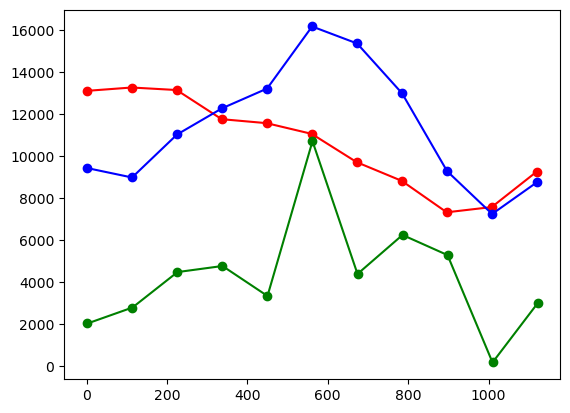

In [50]:
fig, ax = plt.subplots()

colors = ['red', 'blue', 'green']
markers = ['o', 's', '^']

# loop through each Region
for i, region in enumerate(summary_visa_df['Region'].unique()):
    subset = summary_visa_df[summary_visa_df['Region'] == region]

       # loop through each Type of Visa in the current Region
    for j, visa in enumerate(subset['Type of Visa'].unique()):
        subsubset = subset[subset['Type of Visa'] == visa]

        ax.plot(subsubset['Arrivals'], color=colors[j], marker=markers[i], label=visa)
    
    ax.legend(loc='upper left')

plt.show()


